In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import fsolve
sym.init_printing()


In [10]:
A =  np.array([[3,-9],[2,4]])
b=  np.array([[-42],[2]])
np.linalg.solve(A,b)

array([[-5.],
       [ 3.]])

In [11]:
X =  np.array([[1,-2,-1],[2,2,-1],[-1,-1,2]])
b=  np.array([[6],[1],[1]])
np.linalg.solve(X,b)

array([[ 3.],
       [-2.],
       [ 1.]])

In [14]:
Q = np.poly1d([1,0,2,-1])

In [26]:
x = np.random.randn(1,100)
y = Q(x)
x.shape

(1, 100)

In [33]:
from scipy.optimize import fsolve

def resolve(v):
    x = v[0]
    y = v[1]
    
    F = np.empty(2)
    
    F[0] = x**2 + y**2  - 4
    F[1] = np.exp(x) + (x*y) -1
    
    return F

fsolve(resolve,np.array([1,1]))
    

array([1.3210808e-11, 2.0000000e+00])

In [38]:
def resolver(v):
    x = v[0]
    y = v[1]
    
    F = np.empty(2)
    
    F[0] = v[0]* np.cos(v[1]) -4
    F[1] = (v[0]*v[1]) - v[1] -5
    
    return F

fsolve(resolver,np.array([1,1]))

array([6.50409711, 0.90841421])

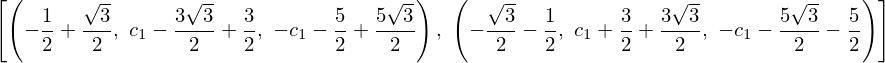

In [40]:
import sympy as sym

sym.init_printing()

x,y,z = sym.symbols('x,y,z')

c1 = sym.Symbol("c1")

f  =  sym.Eq(2*x**2 + y + z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)

sym.solve([f,g,h],(x,y,z))

In [43]:
sym.init_printing()

x,y = sym.symbols('x,y')

c = sym.Symbol("c")

f  =  sym.Eq(x+c,1)
g = sym.Eq(y+2*c,-x)
sym.solve([f,g],(x,y))

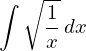

In [46]:
from sympy import * 

Integral(sqrt(1/x),x)

In [4]:
f = lambda x,y: (2-(2*x*y))/(x**2 +1)
g = lambda x: (2*x +1)/(x**2 +1)
z = lambda f,g: abs(f-g)
def RungeKutta(a,b,c,N,f):
    t = np.linspace(a,b,N+1)
    H = (b-a)/N
    y = np.zeros(N+1)
    y[0] = 1
    for i in range(1,N+1):
        k_1 = f(t[i-1],y[i-1])
        k_2 = f(t[i-1]+ H/2,y[i-1] + H* (k_1/2))
        k_3 = f(t[i-1]+ H/2,y[i-1] + H* (k_2/2))
        k_4 = f(t[i-1] + H,y[i-1] + H*k_3)
        y[i] = y[i-1] + (1/6)* H*(k_1 + (2*k_2) + (2*k_3) + k_4)
    return t,y
        

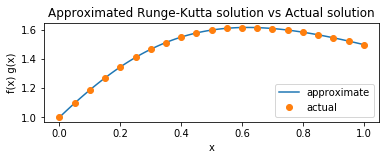

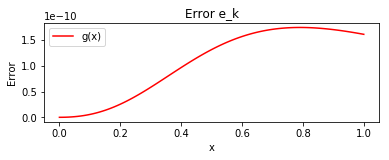

In [14]:
x,y = RungeKutta(0,1,1,100,f) #approximate solution

y_0 = g(x) #actual solution 
err = z(y,y_0)



plt.subplot(2,1,1)
plt.plot(x,y)
plt.plot(x[::5],y_0[::5],'o')
plt.xlabel("x")
plt.ylabel("f(x) g(x)")
plt.title("Approximated Runge-Kutta solution vs Actual solution")
plt.legend(["approximate","actual"])
plt.show()

plt.subplot(2,1,2)
plt.plot(x,err,'r-')
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error e_k")
plt.legend(["g(x)"])
plt.show()